In [2]:
from pup import * 

ModuleNotFoundError: No module named 'pup'

In [57]:
directories = {'defect_directory':'../example/li3ocl/v_Li/defect/',
                     'host_directory':'../example/li3ocl/v_Li/host',
                    'defect_index':74}

In [58]:
kpaths = {'G-M':[[0.0,0.0,0.0],[0.5,0.5,0.0]]} # you can add more paths but currently only does one at a time

In [61]:
from tqdm.notebook import tqdm 
data = {}
p = PhononUnfolder(directories,[3,3,3],**{'tqdm_disable':False})
for kpath in tqdm(kpaths):
    data[kpath] = p.run_all(kpath=kpaths[kpath],line_density=5,eigendisplacement_atom='Li')

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/8040 [00:00<?, ?it/s]

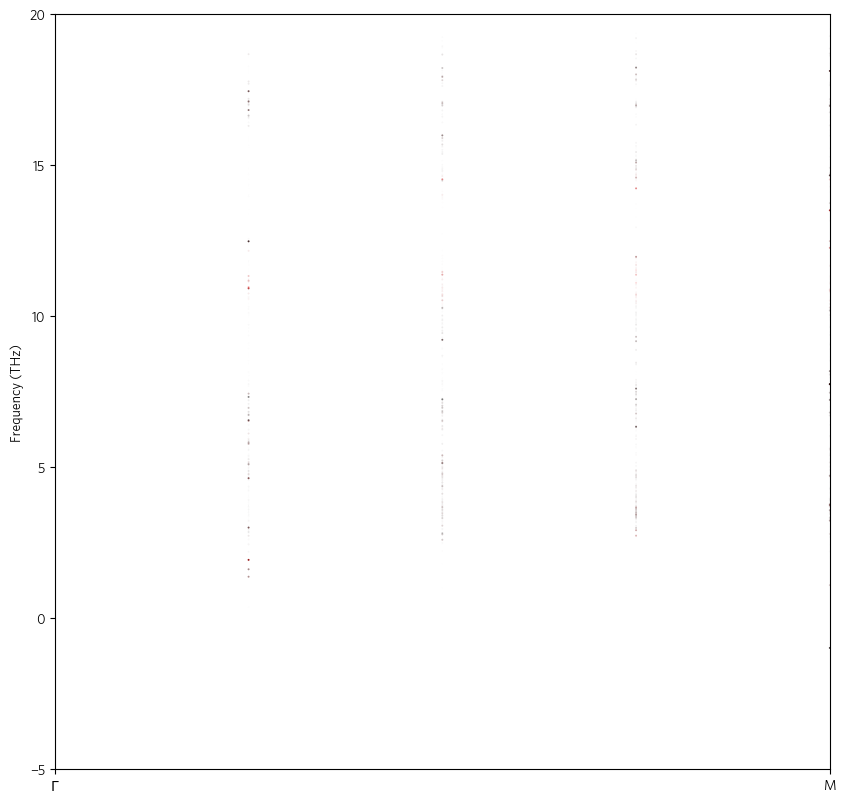

In [68]:
import matplotlib.gridspec as gridspec


fig = plt.figure(figsize=(10,10),dpi=100)
gs = fig.add_gridspec(ncols=len(kpaths),nrows=1,figure=fig)
gs.update(wspace=0)
threshold = 1
g = {}
axes = {}
for i,path in enumerate(kpaths):
    if i == 0:
        axes[i] = fig.add_subplot(gs[0,i])
        axes[i].set_ylim(-5,20)
        axes[i].set_ylabel('Frequency (THz)')
    else:
        axes[i] = fig.add_subplot(gs[0,i])
        axes[i].set_ylim(-5,20)
        axes[i].set_yticks([])
        axes[i].set_yticklabels([])
    g[i] = UnfolderPlotting(data[path]).single_plot_with_weight(axes[i],threshold)